<a href="https://colab.research.google.com/github/bhupathi-20/FMML_projects_and_labs/blob/main/AIML_Module_1_Lab_2_Machine_learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 2
# Machine learning terms and metrics


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)
import pandas as pd

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [ ]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-3-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


In [ ]:
type(dataset)

sklearn.utils._bunch.Bunch

In [ ]:
print(dataset.DESCR)  # uncomment this if you want to know more about this dataset

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
print(dataset.keys())  # if you want to know what else is there in this dataset

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [ ]:
dataset.target

array([4, 3, 3, ..., 0, 0, 0])

Here is a function for calculating the 1-nearest neighbours

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  # print(dist)
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [ ]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  # print(rnd)
  split1 = rnd<percent
  # print(split1)
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

[0.04412301 0.56545602 0.15129036 ... 0.71371729 0.10714925 0.23402692]
[ True False  True ... False  True False]
Number of test samples =  4136
Number of other samples =  16504
Percent of test data =  20.03875968992248 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 70/100)

[0.06074625 0.13151157 0.54657073 ... 0.55848852 0.51487053 0.85884751]
[ True  True  True ...  True  True False]


What is the accuracy of our classifiers on the train dataset?

In [ ]:
traindata

array([[   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   5.6431    ,   52.        ,    5.8173516 , ...,    2.54794521,
          37.85      , -122.25      ],
       [   3.8462    ,   52.        ,    6.28185328, ...,    2.18146718,
          37.85      , -122.25      ],
       ...,
       [   3.7125    ,   28.        ,    6.77906977, ...,    3.02616279,
          39.27      , -121.56      ],
       [   2.5568    ,   18.        ,    6.11403509, ...,    3.12280702,
          39.49      , -121.21      ],
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ]])

In [ ]:
trainlabel

array([3, 3, 3, ..., 1, 0, 0])

In [ ]:
diff = traindata - traindata
sq = diff*diff
print(sq.shape)
a = sq.sum(1)
print(a.shape)
print(a)

(11597, 8)
(11597,)
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.16814693455203933


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.33493879189243425
Validation accuracy using random classifier is  0.16576359622717238


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 90/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

[0.55933633 0.35339516 0.61873002 ... 0.6906628  0.93541171 0.06598581]
[ True  True  True ...  True False  True]
Validation accuracy of nearest neighbour is  0.3504273504273504


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.3578336557059961


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%


#### 1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?

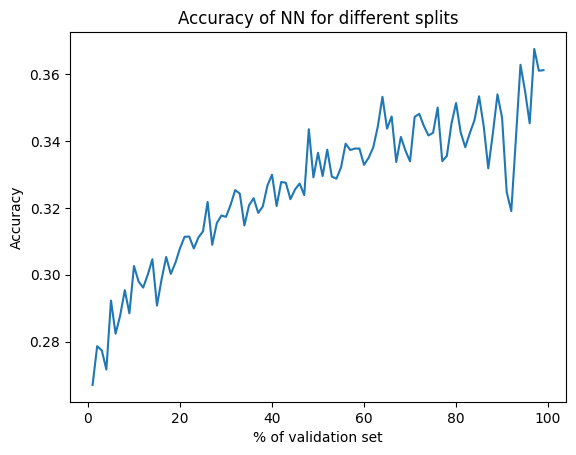

In [ ]:
accuracies = []
for i in range(1, 100):
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)
  valpred = NN(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  accuracies.append(valAccuracy)
plt.plot(list(range(1,100)),accuracies)
plt.xlabel("% of validation set")
plt.ylabel("Accuracy")
plt.title("Accuracy of NN for different splits")
plt.show()

#### As we can see above the performance doesn't change much for validation data above 40%.

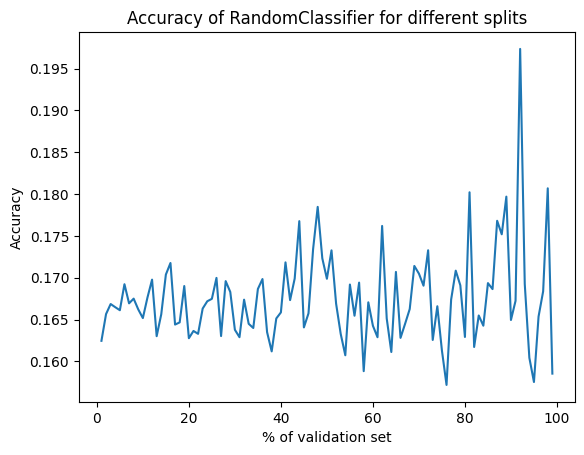

In [ ]:
accuracies = []
for i in range(1, 100):
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)
  valpred = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  accuracies.append(valAccuracy)
plt.plot(list(range(1,100)),accuracies)
plt.xlabel("% of validation set")
plt.ylabel("Accuracy")
plt.title("Accuracy of RandomClassifier for different splits")
plt.show()

#### The accuracy is always around 1/6 = 1.6666666

#### 2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

##### In case of KNN algorithm as there is no training phase, there are no parameters(weights and bias) for the model. There is no concept of overfitting here, so the size of validation set does not affect the training part. But the size of the training data affects the accuracy of test set because more the number of training samples, more are the chances of finding a sample which closely matches the features of the test set.
If the size of the training set is less then we'll always end up with the same labels(present in the training set) as our predictions for the test set.

But in case of ML models that have parameters unlike KNN, the validation set can detect overfitting in the training phase and stop the training before convergence. So, the size of validation set affects the training, in turn the accuracy also gets affected.

No matter what split we take for training, validation and testing, in case of random classifier the accuracy will always be around 1/(number of classes).

#### 3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

#### If we have a small dataset then 60-20-20% split would be good.
#### If we have a very big dataset then splits like 98-1-1% and 99-0.5-0.5% would be fine.

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.34091508745863247
test accuracy is  0.3578336557059961


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


### 1.Does averaging the validation accuracy across multiple splits give more consistent results?

#### Yes averaging the validation accuracy across multiple splits does give more consistent results because in each iteration the samples in the training and validation sets are changing, therefore it gives consistent results.

### 2. Does it give more accurate estimate of test accuracy?

#### Yes it does give more accurate estimate of test accuracy because both the validation and test sets act as testing/validation. As the validation set is changing in every iteration it gives a good estimate of the accuracy on the validation set. The test set can also be consider a validation set, therefore it gives a good estimate of the test accuracy.

### 3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

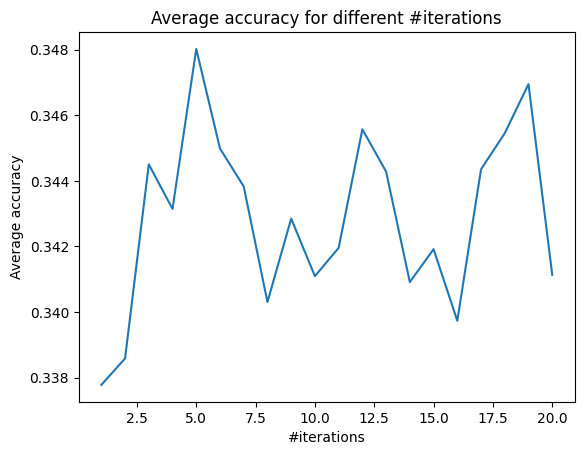

In [ ]:
average_accuracies = []
for i in range(1,21):
  average_accuracies.append(AverageAccuracy(alltraindata, alltrainlabel, 75/100, i, classifier=NN))
plt.plot(list(range(1, 21)), average_accuracies)
plt.xlabel("#iterations")
plt.ylabel("Average accuracy")
plt.title("Average accuracy for different #iterations")
plt.show()

The estimate doesn't improve by increasing the number of iterations. It is changing in the third decimal place only.

### 4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

##### No, we cannot deal with a very small dataset because the number of combinations of the available samples will be very less. If the number of combinations are less then more will be the probability that we'll end up with the same split as before.